<a href="https://colab.research.google.com/github/Alexxakiode/Introduction-to-Machine-Learning/blob/main/Bank_Loan_Approval_Prediction_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREPARING THE DATA LOADING PROCEDURE

Establishing conditions to ensure clear and smooth code run

In [ ]:
#To esablish a system that shuts up unnecessary warnings
!pip install shutup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing unncessary warning avoidance libraries
import shutup;shutup.please()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
#Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import preprocessing

LOADING THE DATA

In [ ]:
#To store away the file on a cloud drive such as Google drive
!pip install --upgrade --q --no-cache-dir gdown

In [ ]:
#Storing the dataset exactly in the main folder as this file on cloud drive
!gdown <"bank-full.csv">

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `gdown <"bank-full.csv">'


In [ ]:
#Importing the dataset from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset for exploration
bank_details = pd.read_csv("/content/drive/MyDrive/ML Assignment/bank-full.csv")

In [ ]:
# Displaying the first 5 lines of the dataset
bank_details.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Displaying the last 5 lines of the dataset
bank_details.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
bank_details = bank_details.drop(["contact", "campaign","poutcome", "pdays", "previous", "day"], axis=1)


In [ ]:
bank_details

,age,job,marital,education,default,balance,housing,loan,month,duration,Target
0,58,management,married,tertiary,no,2143,yes,no,may,261,no
1,44,technician,single,secondary,no,29,yes,no,may,151,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,76,no
3,47,blue-collar,married,unknown,no,1506,yes,no,may,92,no
4,33,unknown,single,unknown,no,1,no,no,may,198,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,nov,977,yes
45207,71,retired,divorced,primary,no,1729,no,no,nov,456,yes
45208,72,retired,married,secondary,no,5715,no,no,nov,1127,yes
45209,57,blue-collar,married,secondary,no,668,no,no,nov,508,no


In [ ]:
bank_details = bank_details.query('education != "unknown"')
bank_details

,age,job,marital,education,default,balance,housing,loan,month,duration,Target
0,58,management,married,tertiary,no,2143,yes,no,may,261,no
1,44,technician,single,secondary,no,29,yes,no,may,151,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,76,no
5,35,management,married,tertiary,no,231,yes,no,may,139,no
6,28,management,single,tertiary,no,447,yes,yes,may,217,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,nov,977,yes
45207,71,retired,divorced,primary,no,1729,no,no,nov,456,yes
45208,72,retired,married,secondary,no,5715,no,no,nov,1127,yes
45209,57,blue-collar,married,secondary,no,668,no,no,nov,508,no


In [ ]:
#Converting categorical features to numerical features for regression
bank_details['default'] = bank_details['default'].map({'no':0, 'yes':1})
bank_details['housing'] = bank_details['housing'].map({'no':0, 'yes':1})
bank_details['loan'] = bank_details['loan'].map({'no':0, 'yes':1})
bank_details['Target'] = bank_details['Target'].map({'no':0, 'yes':1})

In [ ]:
bank_details

,age,job,marital,education,default,balance,housing,loan,month,duration,Target
0,58,management,married,tertiary,0,2143,1,0,may,261,0
1,44,technician,single,secondary,0,29,1,0,may,151,0
2,33,entrepreneur,married,secondary,0,2,1,1,may,76,0
5,35,management,married,tertiary,0,231,1,0,may,139,0
6,28,management,single,tertiary,0,447,1,1,may,217,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,nov,977,1
45207,71,retired,divorced,primary,0,1729,0,0,nov,456,1
45208,72,retired,married,secondary,0,5715,0,0,nov,1127,1
45209,57,blue-collar,married,secondary,0,668,0,0,nov,508,0


EXPERIMENT 1

Problem 1A: To predict customer's default status - Linear or Logistic Regression

Problem 1B: To predict if customers bank account balance, housing status, default status, existing loan and duration of loan will determine ability to get loan or not– Multiple Regression


USING REGRESSION

LINEAR REGRESSION

In [ ]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
BANK_DETAILS = bank_details["balance"]
RESULT = bank_details["Target"]

In [ ]:
X = np.array(BANK_DETAILS).reshape(-1, 1)
y = np.array(RESULT)


In [ ]:
X

array([[2143],
       [  29],
       [   2],
       ...,
       [5715],
       [ 668],
       [2971]])

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

LINEAR RELATIONSHIP CHECKS FOR BALANCE, DURATION AND AGE

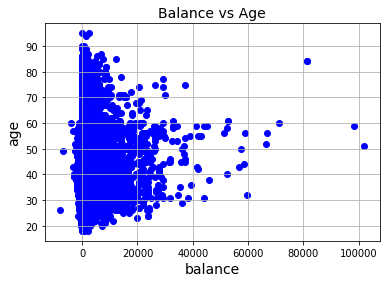

In [ ]:
#Viewing customer's bank balance against their ages

plt.scatter(bank_details['balance'], bank_details['age'], color="blue")
plt.title('Balance vs Age', fontsize=14)
plt.xlabel('balance', fontsize=14)
plt.ylabel('age', fontsize=14)
plt.grid(True)
plt.show()

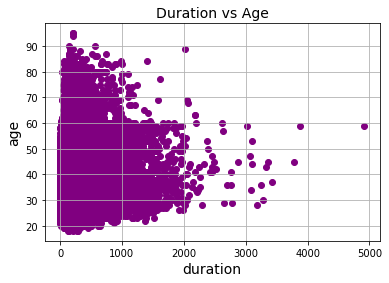

In [ ]:
#Viewing customer's duration against their ages

plt.scatter(bank_details['duration'], bank_details['age'], color='purple')
plt.title('Duration vs Age', fontsize=14)
plt.xlabel('duration', fontsize=14)
plt.ylabel('age', fontsize=14)
plt.grid(True)
plt.show()

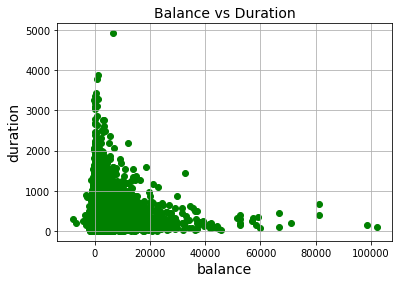

In [ ]:
#Viewing customer's balance against the duration

plt.scatter(bank_details['balance'], bank_details['duration'], color='green')
plt.title('Balance vs Duration', fontsize=14)
plt.xlabel('balance', fontsize=14)
plt.ylabel('duration', fontsize=14)
plt.grid(True)
plt.show()


LINEAR RELATIONSHIP AGAINST TARGET

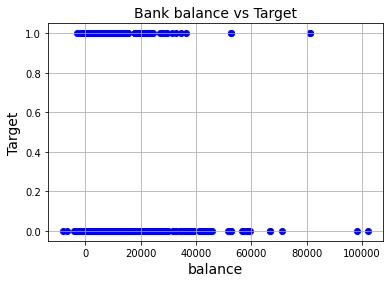

In [ ]:
#Viewing customer's bank balance against the label (Target - loan_approval status)
plt.scatter(bank_details['balance'], bank_details['Target'], color='blue')
plt.title('Bank balance vs Target', fontsize=14)
plt.xlabel('balance', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.grid(True)
plt.show()

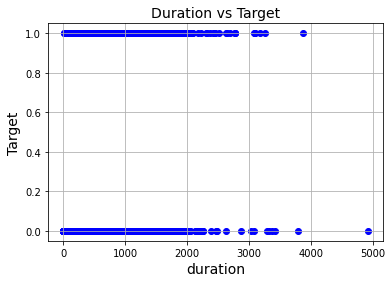

In [ ]:
#Viewing customer's duration of loan against the label (Target - loan_approval status)
plt.scatter(bank_details['duration'], bank_details['Target'], color='blue')
plt.title('Duration vs Target', fontsize=14)
plt.xlabel('duration', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.grid(True)
plt.show()

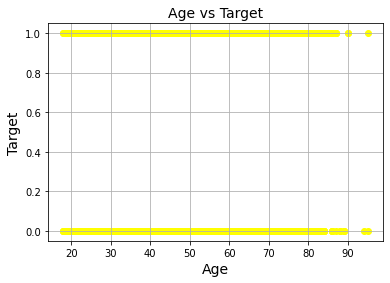

In [ ]:
#Viewing customer's age against the label (Target - loan_approval status)
plt.scatter(bank_details['age'], bank_details['Target'], color='yellow')
plt.title('Age vs Target', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
#Splitting and training the data for test and train purpose
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.3, random_state=1)

In [ ]:
Loan_approval_model = LinearRegression()
Loan_approval_model

LinearRegression()

In [ ]:
#Model fitting
Loan_approval_model.fit(X_train, y_train)
#Model scoring
Loan_approval_model.score(X_test, y_test)

0.00028975775170014817

In [ ]:
#Checking the R2 Score
r_sq = Loan_approval_model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.00253285398533476


In [ ]:
#Finding the intercept and Coefficients
print('Intercept: \n', Loan_approval_model.intercept_)
print('Coefficients: \n', Loan_approval_model.coef_)

Intercept: 
 0.1082674714023591
Coefficients: 
 [6.23239083e-06]


In [ ]:
#Loading and printing the prediction on X_test
y_pred = Loan_approval_model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.11152701 0.12427225 0.12321274 ... 0.11782173 0.12276401 0.11016212]


These results below tends to shows that the more money the customer has in the more, the more chances to get loan approved

In [ ]:
#To verify if it is better to approve loan or not  
#When bank balance=440

y = (0.1082674714023591) + (6.23239083e-06)* 440
y

0.1110097233675591

In [ ]:
#To verify if it is better to approve loan or not  
#When bank balance=44000

y = (0.1082674714023591) + (6.23239083e-06)* 44000
y

0.3824926679223591

In [ ]:
#To verify if it is better to approve loan or not  
#When bank balance=88000

y = (0.1082674714023591) + (6.23239083e-06)* 88000
y

0.656717864442359

Below result shows that the default alone does not really change the chances of getting a loan approved

In [ ]:
#To verify if it is better to approve loan or not  
#When default=0

y = (0.1082674714023591) + (6.23239083e-06)* 0
y

0.1082674714023591

In [ ]:
#To verify if it is better to approve loan or not  
#When default=1

y = (0.1082674714023591) + (6.23239083e-06)* 1
y

0.1082737037931891

Below result shows that the age alone does not really change the chances of getting a loan approved

In [ ]:
#To verify if it is better to approve loan or not  
#When age=17

y = (0.1082674714023591) + (6.23239083e-06)* 17
y

0.10837342204646909

In [ ]:
#To verify if it is better to approve loan or not  
#When age=95

y = (0.1082674714023591) + (6.23239083e-06)* 95
y

0.10885954853120909